# Playground

In [22]:
import numpy as np
import networkx as nx
import csv
import matplotlib.pyplot as plt
from random import random
import os

In [3]:
np.set_printoptions(precision=3)
n=10
p=0.1

A_prob = np.random.rand(n,n)
print(A_prob)

A = (A_prob < p).astype('int')
print(A)

[[0.577 0.764 0.079 0.005 0.925 0.849 0.267 0.879 0.26  0.556]
 [0.759 0.193 0.841 0.727 0.18  0.51  0.59  0.433 0.894 0.733]
 [0.215 0.007 0.436 0.29  0.653 0.142 0.718 0.43  0.673 0.217]
 [0.537 0.061 0.496 0.879 0.081 0.514 0.46  0.702 0.441 0.635]
 [0.014 0.825 0.203 0.999 0.997 0.747 0.402 0.727 0.103 0.343]
 [0.84  0.2   0.358 0.044 0.354 0.505 0.805 0.95  0.141 0.557]
 [0.748 0.48  0.678 0.701 0.462 0.7   0.714 0.674 0.797 0.75 ]
 [0.141 0.747 0.56  0.372 0.238 0.881 0.887 0.834 0.526 0.297]
 [0.791 0.174 0.218 0.174 0.26  0.58  0.62  0.461 0.315 0.608]
 [0.669 0.807 0.745 0.841 0.986 0.568 0.89  0.176 0.814 0.027]]
[[0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]]


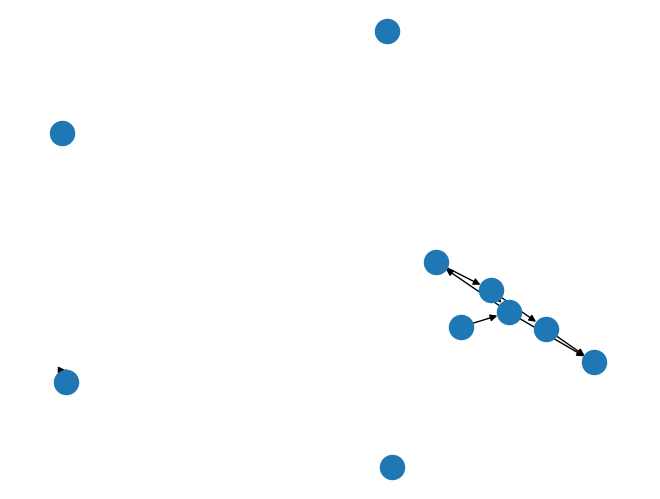

In [4]:
G = nx.DiGraph(np.array(A))
# G = nx.from_numpy_array(A)
nx.draw(G)

# File Generation

In [24]:
# Function for generating a CSV file containing an Erdos-Renyi network
def erdos_reyni_csv_generator(num_nodes, probability, ERY_filename):
    
    if os.path.exists(ERY_filename):
        print(f"The file {ERY_filename} already exists. Skipping CSV Generation.")
        return
    
    G = nx.erdos_renyi_graph(num_nodes, probability)
    with open(ERY_filename, 'w', newline='') as file:
        writer = csv.writer(file)
        for edge in G.edges:
            # file.write(f"{edge[0]},{edge[1]}\n")
            writer.writerow(edge)

# Example usage: Generate an Erdos-Renyi graph with  nodes and edge probability 0.5 and save it to erdos_reyni_network.csv

num_nodes = 10_000
probability = 0.3

ERY_filename = f'erdos_reyni_network_{num_nodes}.csv'
erdos_reyni_csv_generator(num_nodes, probability, ERY_filename)
print(f"Erdos-Renyi graph generated with {num_nodes} nodes and edge probability {probability}, saved to {ERY_filename}!")

Erdos-Renyi graph generated with 10000 nodes and edge probability 0.3, saved to erdos_reyni_network_10000.csv!


In [36]:
# Function for generating a Barabasi-Albert network in CSV format
def barabasi_albert_csv_generator(num_nodes, num_edges_to_attach, BA_filename):
    
    if os.path.exists(BA_filename):
        print(f"The file {BA_filename} already exists. Skipping CSV Generation.")
        return
    
    G = nx.barabasi_albert_graph(num_nodes, num_edges_to_attach)
    with open(BA_filename, 'w', newline='') as file:
        writer = csv.writer(file)
        for edge in G.edges:
            writer.writerow(edge)

# Example usage:
num_nodes = 1000  # Number of nodes in the network
num_edges_to_attach = 3  # Number of edges to attach from a new node to existing nodes
BA_filename = f"barabasi_albert_network_{num_nodes}.csv"  # Output filename

barabasi_albert_csv_generator(num_nodes, num_edges_to_attach, BA_filename)
print(f"Barabási-Albert network with {num_nodes} nodes and {num_edges_to_attach} edges to attach saved to {BA_filename}.")

Barabási-Albert network with 1000 nodes and 3 edges to attach saved to barabasi_albert_network_1000.csv.


In [37]:
# Generate a Watts-Strogatz network in CSV format
def watts_strogatz_csv_generator(num_nodes, k, p, WS_filename):
    
    if os.path.exists(WS_filename):
        print(f"The file {WS_filename} already exists. Skipping CSV Generation.")
        return
    
    G = nx.watts_strogatz_graph(num_nodes, k, p)
    with open(WS_filename, 'w', newline='') as file:
        writer = csv.writer(file)
        for edge in G.edges:
            writer.writerow(edge)

# Example usage:
num_nodes = 5000  # Number of nodes in the network
k = 4  # Each node is connected to k nearest neighbors in a ring topology
p = 0.1  # Probability of rewiring each edge
WS_filename = f"watts_strogatz_network_{num_nodes}.csv"  # Output filename

watts_strogatz_csv_generator(num_nodes, k, p, WS_filename)
print(f"Watts-Strogatz network with {num_nodes} nodes, k={k}, and p={p} saved to {WS_filename}.")

Watts-Strogatz network with 5000 nodes, k=4, and p=0.1 saved to watts_strogatz_network_5000.csv.


# Simulation 

# Chat GPT Prompt

In [45]:
import random

# Reading the above network generated file 
def load_graph_from_csv(filename):
    """
    Reads a Graph from above generated csv file
    """
    G = nx.Graph()
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            node1, node2 = row
            G.add_edge(node1, node2)
    return G

# A function to simulate the infection process
def simulate_infection(graph, p_infect, initial_infected):
    """
    Args:
    graph: The network graph.
    p_infect: The probability of infecting an unifected node.
    infected_nodes: List of initial infected nodes.

    Returns:
    rounds: time taken to infect nodes in each simulation.
    a list of infection nodes in each simulation.
    """
    infected = set(initial_infected) # set to allow no duplicates
    infection_history = [list(infected)]
    rounds = 0
    while len(infected) < len(graph.nodes):
        new_infected = set()
        for node in list(infected):
            neighbors = list(graph.neighbors(node))
            # random.shuffle(neighbors)
            for neighbor in neighbors:
                if neighbor not in infected and random.random() < p_infect:
                    new_infected.add(neighbor)

        infected.update(new_infected)
        infection_history.append(list(new_infected))
        rounds += 1
    return rounds, infection_history

# Simultaneous cure and infection with defense
def simultaneous_infection_with_defense(graph, p_infect, p_defense, initial_infected, initial_cured):
    """
    Simulates worm propagation with defense on the graph for a certain number of rounds.

    Args:
    graph: The network graph.
    p_infection: The probability of infecting an uninfected node.
    p_defense: The probability of inoculating/curing a node.
    infected_nodes: List of initial infected nodes.
    initial_defense_node: The initial node from which defense starts.
    """
    infected = set(initial_infected)
    cured = set(initial_cured)
    infection_history = [list(infected)]
    cured_history = [list(cured)]
    rounds = 0
    while len(infected) < len(graph.nodes):
        newly_infected = set()
        newly_cured = set()
        
        for node in list(infected):
            neighbors = list(graph.neighbors(node))
            # random.shuffle(neighbors)
            for neighbor in neighbors:
                if neighbor not in infected and random.random() < p_infect:
                    newly_infected.add(neighbor)
        
        for node in list(cured) + list(infected):
            neighbors = list(graph.neighbors(node))
            # random.shuffle(neighbors)
            for neighbor in neighbors:
                if neighbor in infected and neighbor not in cured and random.random() < p_defense:
                    newly_cured.add(neighbor)
                    newly_infected.discard(neighbor)

        infected.update(newly_infected)
        cured.update(newly_cured)
        infected -= newly_cured

        infection_history.append(list(newly_infected))
        cured_history.append(list(newly_cured))

        rounds+=1
        
    return rounds, infection_history, cured_history

In [56]:
def plot_results_1(infection_history_1):
    """
    Deliverable (a)
    """
    # Prepare data for plotting
    cumulative_infections_1 = [len(infected_nodes) for infected_nodes in infection_history_1]
    new_infections_1 = [cumulative_infections_1[0]] + [cumulative_infections_1[i] - cumulative_infections_1[i-1] for i in range(1, len(cumulative_infections_1))]

    # Plotting
    plt.figure(figsize=(14, 6))

    # Cumulative infections plot
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(cumulative_infections_1)+1), cumulative_infections_1, marker='o')
    plt.title('Cumulative Number of Infections Over Time')
    plt.xlabel('Time Step')
    plt.ylabel('Cumulative Infections')
    plt.legend()

    # New infections per time step plot
    plt.subplot(1, 2, 2)
    plt.bar(range(1, len(new_infections_1)+1), new_infections_1)
    plt.title('New Infections Per Time Step')
    plt.xlabel('Time Step')
    plt.ylabel('Number of New Infections')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [60]:
def plot_results_2(infection_history_2, cured_history_2):
    """
    Deliverable (c), (d), and (e)
    """
    # Data preparation for plotting
    cumulative_infections_2 = [len(infected_nodes) for infected_nodes in infection_history_2]
    cumulative_cures = [len(cured) for cured in cured_history_2]
    
    # Calculate new infections and new cures per time step
    #new_infections_2 = [infection_history_2[0]] + [infection_history_2[i] - infection_history_2[i-1] for i in range(1, len(infection_history_2))]
    new_infections_2 = [cumulative_infections_2[0]] + [cumulative_infections_2[i] - cumulative_infections_2[i-1] for i in range(1, len(cumulative_infections_2))]
    new_cures = [len(cured_history_2[0])] + [len(cured_history_2[i]) - len(cured_history_2[i-1]) for i in range(1, len(cured_history_2))]

    # Plotting
    plt.figure(figsize=(14, 6))

    # Cumulative plot
    plt.subplot(1, 2, 1)
    plt.plot(cumulative_infections_2, label='Cumulative Infections', marker='o')
    plt.plot(cumulative_cures, label='Cumulative Cures', marker='x')
    plt.title('Cumulative Infections and Cures Over Time')
    plt.xlabel('Time Step')
    plt.ylabel('Count')
    plt.legend()

    # New infections and cures per time step plot
    plt.subplot(1, 2, 2)
    plt.bar(range(len(new_infections_2)), new_infections_2, label='New Infections')
    plt.bar(range(len(new_cures)), new_cures, label='New Cures', alpha=0.7)
    plt.title('New Infections and Cures Per Time Step')
    plt.xlabel('Time Step')
    plt.ylabel('Number')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Chat GPT prompt's main function

Simulation 1:
 Round 1: ['450', '600', '5', '700']
 Round 2: ['110', '138', '555', '1', '137', '141', '680', '763', '588', '387', '58', '69', '309', '67', '130', '34', '73', '189', '16', '561', '380', '422', '92', '690', '296', '49', '163', '108', '91', '17', '24']
 Round 3: ['107', '871', '954', '551', '164', '59', '439', '581', '46', '113', '133', '761', '891', '200', '870', '2', '658', '601', '28', '937', '507', '467', '543', '347', '96', '920', '51', '840', '556', '953', '4', '822', '150', '580', '460', '974', '567', '642', '43', '187', '99', '899', '404', '973', '114', '21', '94', '289', '283', '0', '330', '65', '202', '743', '11', '615', '447', '734', '280', '93', '399', '803', '105', '103', '180', '224', '704', '457', '485', '475', '7', '513', '140', '300', '219', '434', '217', '444', '250', '329', '227', '63', '170', '238', '205', '626', '498', '242', '143', '377', '75', '449', '169', '241', '106', '177', '634', '153', '145', '635', '703', '546', '33', '82', '230', '19', '52', 

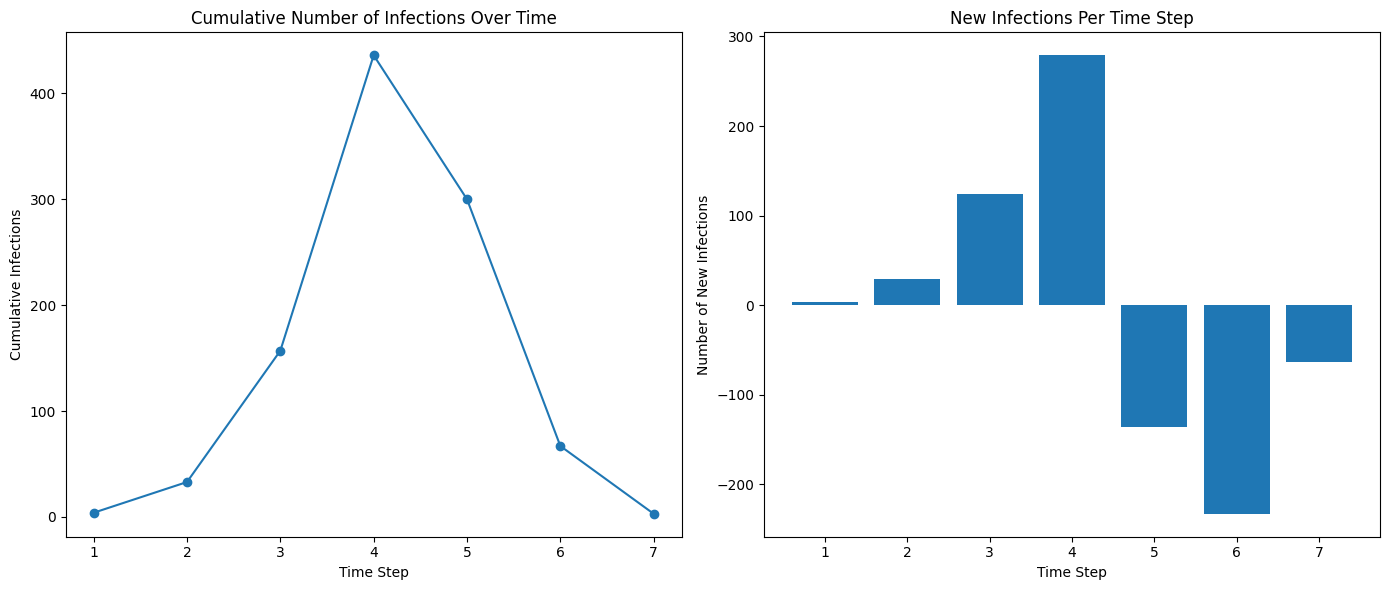

Simulation 1:
 Round 1: ['450', '600', '5', '700']
 Round 2: ['110', '138', '571', '42', '555', '1', '680', '94', '58', '34', '73', '467', '10', '16', '358', '422', '52', '296', '580', '224', '108', '91', '17', '44', '513', '24']
 Round 3: ['107', '844', '164', '12', '675', '724', '650', '172', '439', '666', '520', '761', '891', '601', '618', '28', '37', '476', '51', '347', '840', '556', '56', '411', '4', '92', '460', '470', '23', '201', '163', '186', '709', '503', '889', '38', '687', '830', '879', '789', '404', '27', '839', '114', '21', '68', '289', '0', '330', '753', '390', '65', '743', '615', '285', '447', '280', '482', '270', '983', '193', '47', '803', '595', '76', '799', '651', '180', '457', '475', '485', '272', '7', '140', '918', '334', '410', '815', '217', '141', '329', '349', '473', '244', '566', '626', '395', '498', '213', '377', '75', '169', '241', '243', '153', '145', '635', '703', '33', '893', '911', '419', '82', '19', '218', '263', '102', '907', '665', '386', '421', '20', 

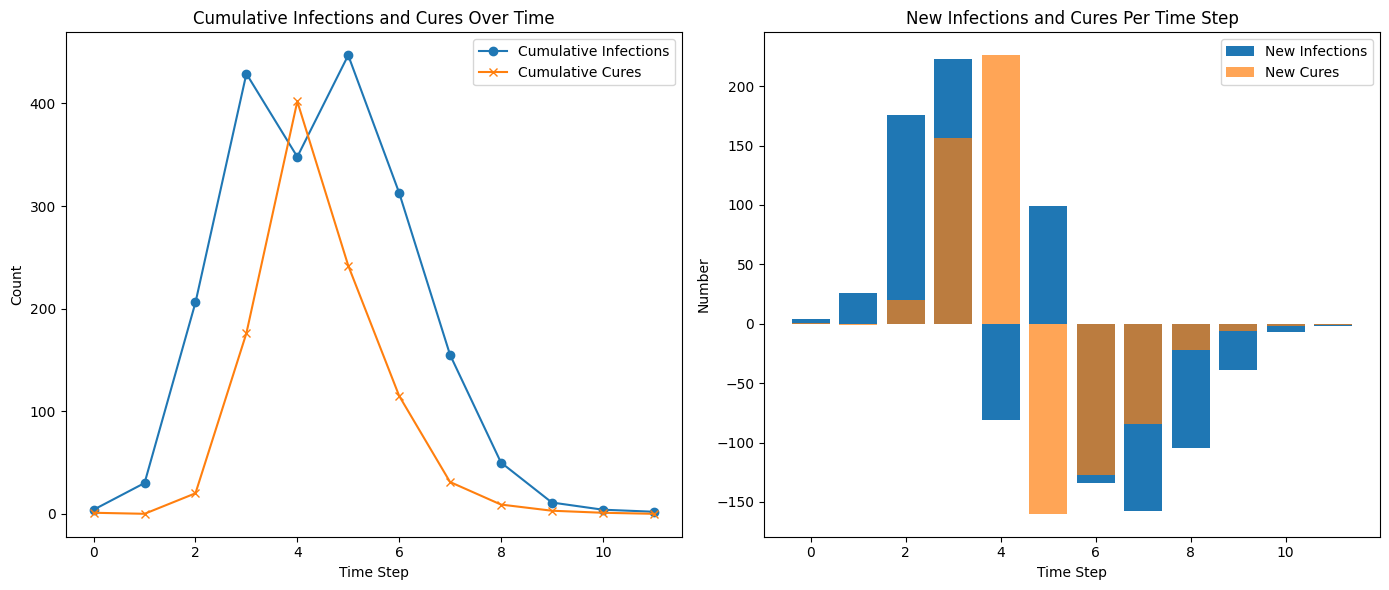

In [61]:
# Main function to run the simulation
def main():
    """
    Main function to read input and run simulation.
    """
    # Program 1 Inputs
    filename = input("Enter the filename of the CSV file for the graph: ") # first input
    p_infect = float(input("Enter the probability value of the worm infecting an uninfected node (p_infect): "))  # second input
    initial_infected = input("Enter the initial infected node(s) separated by commas: ").split(',') # third input

    # Program 2 Inputs
    p_defense = float(input("Enter the probability value of a node getting inoculated or cured (p_defense): "))
    initial_cured = input("Enter the initial cured node(s) separated by commas: ").split(',')
    
    graph = load_graph_from_csv(filename)

    num_simulations = 15
    total_time = 0

    for i in range(num_simulations):
        time_taken_1, infection_history_1 = simulate_infection(graph.copy(), p_infect, initial_infected)
        total_time += time_taken_1
        print(f"Simulation {i+1}:")
        for round, infected_nodes in enumerate(infection_history_1, start=1):
            print(f" Round {round}: {infected_nodes}")

    # Results
    average_time_1 = total_time / num_simulations
    print("Average time taken to infect all nodes: ", average_time_1)
    
    # Plot
    plot_results_1(infection_history_1)
    

    for i in range(num_simulations):
        time_taken_2, infection_history_2, cured_history_2 = simultaneous_infection_with_defense(graph.copy(), p_infect, p_defense, initial_infected, initial_cured)
        total_time += time_taken_2
        print(f"Simulation {i+1}:")
        for round, infected_nodes in enumerate(infection_history_2, start=1):
            print(f" Round {round}: {infected_nodes}")
    
    # Results
    average_time_2 = total_time / num_simulations
    print("Average time taken to infect all nodes with defense mechanism:", average_time_2)

    # Plot
    plot_results_2(infection_history_2, cured_history_2)

if __name__ == "__main__":
    main()

1. Erdos-Reyni Network showed uniform spread to their random nature.
2. Barabasi-Albert Network with free-scale properties, exhibited faster initial spread due to the presence of highly connected nodes.
3. Watts-Strogatz Network demonstrated a mix of behaviours due to their small-world properties, with rapid spread within local clusters(rings) but slower spread between them

The rate absolutely depdends on the type of network.


TODO - 
1. Different test cases
2. graph visualizations
3. Analysis Report

# Deliverable A